# Euler変換によるζ(1.5)の計算

* 黒木玄
* 2021-03-25, 2023-06-09

In [1]:
using Plots
default(fmt=:png, titlefontsize=11)
using SpecialFunctions
SpecialFunctions.lgamma(x::Real) = logabsgamma(x)[1]
logrelerr(x, y) = log10(abs(x/y - 1))

logrelerr (generic function with 1 method)

## Euler変換

交代級数のEuler変換については

* [02 級数](https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/02+series.ipynb#Euler%E5%A4%89%E6%8F%9B%E3%81%AB%E3%82%88%E3%82%8B%E4%BA%A4%E4%BB%A3%E7%B4%9A%E6%95%B0%E3%81%AE%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97)

* [交代ゼータ函数のオイラー変換](https://nbviewer.jupyter.org/gist/genkuroki/4a8fea5e2ed1b4e3b737c99acf237042)

を参照. さらに

* [ディリクレ級数の滑らかなカットオフ](https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/A01+Smooth+cutoff+of+Dirichlet+series.ipynb)

も参考になるはず. 交代ゼータ函数は極を持たないので, 滑らかなカットオフが正確な値に収束してくれる.

交代ゼータ函数 $\eta(s)$ は次のように定義される:

$$
\eta(s) = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{n^s}
$$

正確にはこれの解析接続を交代ゼータ函数と呼ぶことにする. $\eta(s)$ は複素平面上で極を持たない. Riemannのゼータ函数

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

との関係は,

$$
\eta(s) = \sum_{n=1}^\infty \frac{1}{n^s} - 2 \sum_{n=1}^\infty \frac{1}{(2n)^s} =
\zeta(s) - 2\frac{1}{2^s}\zeta(s) = (1 - 2^{1-s})\zeta(s)
$$

なので, $\eta(s)$ が計算できれば $\zeta(s)$ は

$$
\zeta(s) = \frac{\eta(s)}{1 - 2^{1-s}}
$$

で計算できる.

$\displaystyle \sum_{k=0}^\infty (-1)^k a_k$ のEuler変換の結果は

$$
\lim_{L\to\infty} \sum_{k=0}^{L-1} w^{(L)}_k (-1)^k a_k, \quad
w^{(L)}_k = \sum_{n=k}^{L-1} 2^{-n-1}\binom{n}{k}.
$$

$w^{(L)}_k$ を次の $k$ の滑らかな函数で近似できる:

$$
w_{\mathrm{smooth}}^{(L)}(k) = 
\frac{1}{2}\mathrm{erfc}\left(\frac{k-L/2}{\sqrt{L/2}}\right), \quad
\mathrm{erfc}(x) = \int_x^\infty\frac{e^{-t^2}}{\sqrt{\pi}}\,dt
$$

http://www.kurims.kyoto-u.ac.jp/~ooura/papers/CET-R99.pdf のp.2を見よ.

In [2]:
binomover2np1(n, k) = exp(loggamma(n+1) - loggamma(k+1) - loggamma(n-k+1) - (n+1)*log(2))
eulerweight(L, k) = sum(binomover2np1(n, k) for n in k:L-1; init=0.0)

struct EulerWeight{T} W::Matrix{T} end

function EulerWeight(; Lmax=2^6)
    W = eulerweight.(1:Lmax, (0:Lmax-1)')
    EulerWeight(W)
end

(w::EulerWeight)(L, k) = w.W[L, k+1]

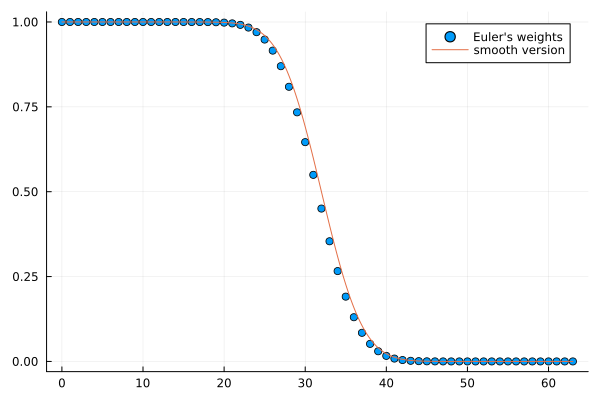

In [3]:
Lmax = 2^6
w::EulerWeight{Float64} = EulerWeight(; Lmax)
w_smooth(L, k) = (1/2)*erfc((k-L/2)/sqrt(L/2))

k = 0:Lmax-1
x = range(extrema(k)...; length=1001)
scatter(k, w.(Lmax, k); label="Euler's weights")
plot!(x, w_smooth.(Lmax, x); label="smooth version")

In [4]:
eta_naive(s, L=2^6) = sum((-1)^(n-1)/n^s for n in 1:L )
eta_euler(s, L=2^6; w=w) = sum(w(L, n-1)*(-1)^(n-1)/n^s for n in 1:L)
etasmooth(s, L=2^6; w=w_smooth) = eta_euler(s, L; w)
etacutoff(s, L=2^6; N=30) = sum(exp(-(n/N)^2)*(-1)^(n-1)/n^2 for n in 1:L)
@doc eta

```
eta(s)
```

Dirichlet eta function $\eta(s) = \sum^\infty_{n=1}(-1)^{n-1}/n^{s}$.


In [5]:
L = Lmax
eta_naive_val = eta_naive(1.5, L)
eta_euler_val = eta_euler(1.5, L)
eta_smoothval = etasmooth(1.5, L)
eta_exact_val = eta(1.5)
@show eta_naive_val
@show eta_euler_val
@show eta_smoothval
@show eta_exact_val;

eta_naive_val = 0.7641819041811663
eta_euler_val = 0.7651470246254073
eta_smoothval = 0.7651470246254077
eta_exact_val = 0.7651470246254081


In [6]:
zeta_naive_val = eta_naive_val/(1 - 2^(1-1.5))
zeta_euler_val = eta_euler_val/(1 - 2^(1-1.5))
zeta_smoothval = eta_smoothval/(1 - 2^(1-1.5))
zeta_exact_val = eta_exact_val/(1 - 2^(1-1.5))
@show zeta_naive_val
@show zeta_euler_val
@show zeta_smoothval
@show zeta_exact_val;

zeta_naive_val = 2.6090802213754354
zeta_euler_val = 2.6123753486854864
zeta_smoothval = 2.612375348685488
zeta_exact_val = 2.612375348685489


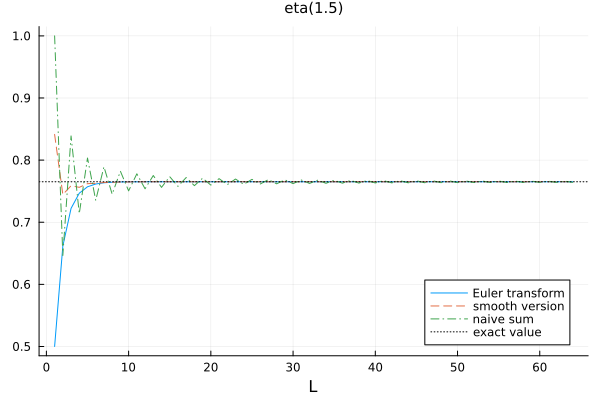

In [7]:
ENV["LINES"] = 100
L = 1:Lmax
s_big = big"1.5"
s = Float64(s_big)
eta_naive_val = eta_naive.(s, L)
eta_euler_val = eta_euler.(s, L)
eta_smoothval = etasmooth.(s, L)
eta_exact_val = eta(s_big)
plot(; legend=:bottomright, xlabel="L")
plot!(L, eta_euler_val; label="Euler transform")
plot!(L, eta_smoothval; label="smooth version", ls=:dash)
plot!(L, eta_naive_val; label="naive sum", ls=:dashdot)
hline!([eta_exact_val]; label="exact value", c=:black, ls=:dot)
title!("eta($s)"; titlefontsize=10)

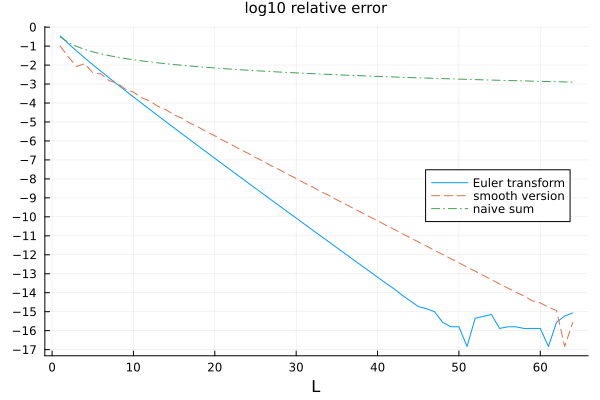

In [8]:
naive_logrelerr = logrelerr.(eta_naive_val, eta_exact_val)
euler_logrelerr = logrelerr.(eta_euler_val, eta_exact_val)
smoothlogrelerr = logrelerr.(eta_smoothval, eta_exact_val)
plot(; legend=:right, xlabel="L", ytick=-100:100)
plot!(L, euler_logrelerr; label="Euler transform")
plot!(L, smoothlogrelerr; label="smooth version", ls=:dash)
plot!(L, naive_logrelerr; label="naive sum", ls=:dashdot)
title!("log10 relative error"; titlefontsize=10)

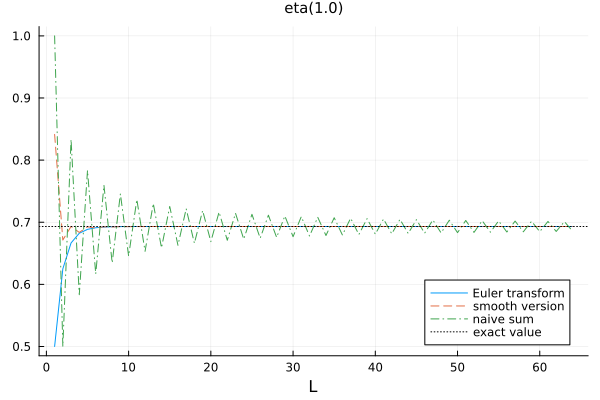

In [9]:
ENV["LINES"] = 100
L = 1:Lmax
s_big = big"1.0"
s = Float64(s_big)
eta_naive_val = eta_naive.(s, L)
eta_euler_val = eta_euler.(s, L)
eta_smoothval = etasmooth.(s, L)
eta_exact_val = eta(s_big)
plot(; legend=:bottomright, xlabel="L")
plot!(L, eta_euler_val; label="Euler transform")
plot!(L, eta_smoothval; label="smooth version", ls=:dash)
plot!(L, eta_naive_val; label="naive sum", ls=:dashdot)
hline!([eta_exact_val]; label="exact value", c=:black, ls=:dot)
title!("eta($s)"; titlefontsize=10)

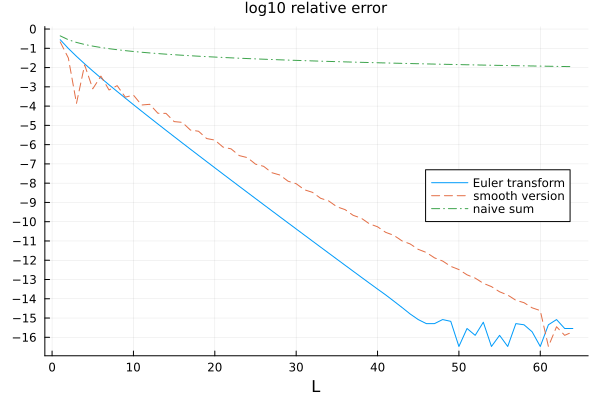

In [10]:
naive_logrelerr = logrelerr.(eta_naive_val, eta_exact_val)
euler_logrelerr = logrelerr.(eta_euler_val, eta_exact_val)
smoothlogrelerr = logrelerr.(eta_smoothval, eta_exact_val)
plot(; legend=:right, xlabel="L", ytick=-100:100)
plot!(L, euler_logrelerr; label="Euler transform")
plot!(L, smoothlogrelerr; label="smooth version", ls=:dash)
plot!(L, naive_logrelerr; label="naive sum", ls=:dashdot)
title!("log10 relative error"; titlefontsize=10)

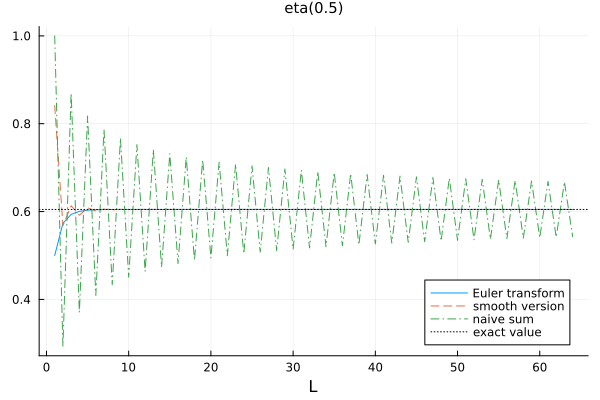

In [11]:
ENV["LINES"] = 100
L = 1:Lmax
s_big = big"0.5"
s = Float64(s_big)
eta_naive_val = eta_naive.(s, L)
eta_euler_val = eta_euler.(s, L)
eta_smoothval = etasmooth.(s, L)
eta_exact_val = eta(s_big)
plot(; legend=:bottomright, xlabel="L")
plot!(L, eta_euler_val; label="Euler transform")
plot!(L, eta_smoothval; label="smooth version", ls=:dash)
plot!(L, eta_naive_val; label="naive sum", ls=:dashdot)
hline!([eta_exact_val]; label="exact value", c=:black, ls=:dot)
title!("eta($s)"; titlefontsize=10)

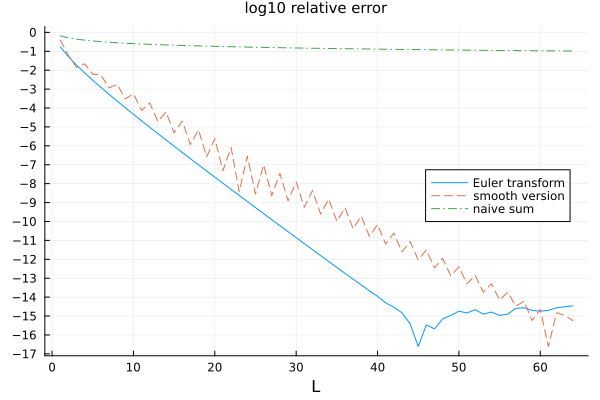

In [12]:
naive_logrelerr = logrelerr.(eta_naive_val, eta_exact_val)
euler_logrelerr = logrelerr.(eta_euler_val, eta_exact_val)
smoothlogrelerr = logrelerr.(eta_smoothval, eta_exact_val)
plot(; legend=:right, xlabel="L", ytick=-100:100)
plot!(L, euler_logrelerr; label="Euler transform")
plot!(L, smoothlogrelerr; label="smooth version", ls=:dash)
plot!(L, naive_logrelerr; label="naive sum", ls=:dashdot)
title!("log10 relative error"; titlefontsize=10)

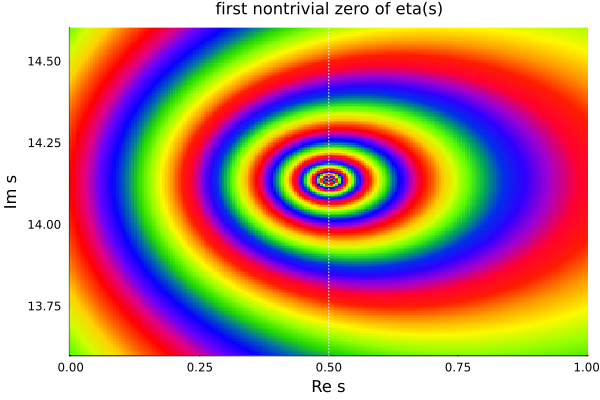

In [13]:
x = range(0, 1, 201)
y = range(13.6, 14.6, 201)
s = complex.(x', y)
z = @. log(abs(eta(s)))

heatmap(x, y, z; c=:prism, colorbar=false)
vline!([0.5]; label="", c=:white, ls=:dot)
plot!(xguide="Re s", yguide="Im s")
title!("first nontrivial zero of eta(s)")

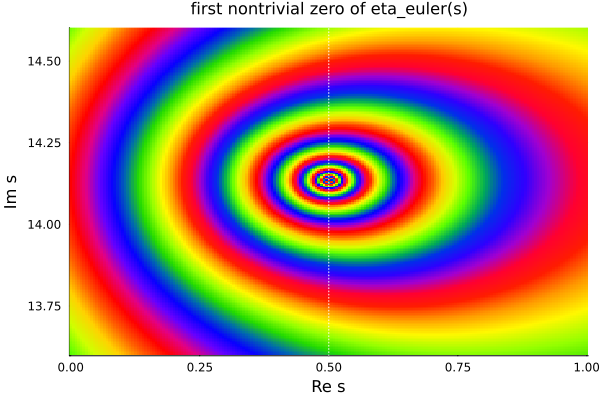

In [14]:
x = range(0, 1, 201)
y = range(13.6, 14.6, 201)
s = complex.(x', y)
z = @. log(abs(eta_euler(s)))

heatmap(x, y, z; c=:prism, colorbar=false)
vline!([0.5]; label="", c=:white, ls=:dot)
plot!(xguide="Re s", yguide="Im s")
title!("first nontrivial zero of eta_euler(s)")

## Euler-Maclaurinの公式

近似公式

$$
\zeta(s) \approx
\sum_{n=1}^{a-1}\frac{1}{n^s} - \frac{a^{1-s}}{1-s} + \frac{1}{2a^s} + 
\sum_{k=2}^n \frac{B_k}{ka^{s+k-1}}\binom{-s}{k-1}
$$

の詳細については

* [13 Euler-Maclaurinの和公式](https://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/13+Euler-Maclaurin+summation+formula.ipynb)

を参照せよ. 実際の計算時には $k\geqq 2$ かつ $k$ が奇数のとき $B_k = 0$ になることに注意せよ.

$$
\zeta(s) \approx
\sum_{n=1}^{a-1}\frac{1}{n^s} - \frac{a^{1-s}}{1-s} + \frac{1}{2a^s} + 
\sum_{k=1}^m \frac{B_{2k}}{2k a^{s+2k-1}}\binom{-s}{2k-1}
$$

In [15]:
mydiv(a, b) = a/b
mydiv(a::Rational, b::Rational) = a//b
mydiv(a::Integer, b::Integer) = a ÷ b

function mybinom(n, k)
    k < 0 && return zero(n)
    iszero(k) && return one(n)
    b = one(n)
    for j in 1:k
        b = mydiv(b*(n - k + j), j)
    end
    b
end

struct Bernoulli{T} B::T end
function Bernoulli(nmax::Integer = 30, T::Type = Int64)
    B = zeros(Rational{T}, nmax + 1)
    B[begin]   = 1     # B_0
    B[begin+1] = -1//2 # B_1
    for n in T(2):2:nmax
        B[begin+n] = -1//(n+1) * sum(mybinom(n+1, j)*B[begin+j] for j in 0:n-1)
    end
    Bernoulli(B)
end
(B::Bernoulli)(n) = B.B[begin+n]
B = Bernoulli()
@show B.(0:30)

function zeta_em(s::AbstractFloat, a=10, m=9; B=B)
    n = 2m
    z = sum(1/n^s for n in 1:a-1; init=zero(s))
    z += -a^(1 - s)/(1 - s)
    n == 0 && return z
    z += 1/(2*a^s)
    n == 1 && return z
    z += -sum(typeof(s)(B(k))/(k*a^(s+k-1))*mybinom(-s, k-1) for k in 2:2:n)
    z
end

zeta_em(s::Real, a=10, m=9; B=B) = zeta_em(float(s), a, m; B)

B.(0:30) = Rational{Int64}[1//1, -1//2, 1//6, 0//1, -1//30, 0//1, 1//42, 0//1, -1//30, 0//1, 5//66, 0//1, -691//2730, 0//1, 7//6, 0//1, -3617//510, 0//1, 43867//798, 0//1, -174611//330, 0//1, 854513//138, 0//1, -236364091//2730, 0//1, 8553103//6, 0//1, -23749461029//870, 0//1, 8615841276005//14322]


zeta_em (generic function with 6 methods)

In [16]:
zeta_em____2 = zeta_em(2, 10, 9; B)
zeta_exact_2 = zeta(2)
@show zeta_em____2
@show zeta_exact_2;

zeta_em____2 = 1.6449340668482264
zeta_exact_2 = 1.6449340668482273


In [17]:
zeta_em____1_5 = zeta_em(1.5, 9, 8; B)
zeta_exact_1_5 = zeta(1.5)
@show zeta_em____1_5
@show zeta_exact_1_5;

zeta_em____1_5 = 2.6123753486854886
zeta_exact_1_5 = 2.6123753486854886


In [18]:
function plot_em_relerrs(s)
    a = 1:10
    zeta_em____val = zeta_em.(s, a, a .- 1; B)
    zeta_exact_val = zeta(BigFloat(s))
    em_logrelerr = logrelerr.(zeta_em____val, zeta_exact_val)
    plot(2a, em_logrelerr; label="", xlabel="number of terms", xtick=2a, ytick=-100:100)
    title!("log10 relative errors of Euler-Maclaurin approximaton of zeta($s)")
end

plot_em_relerrs (generic function with 1 method)

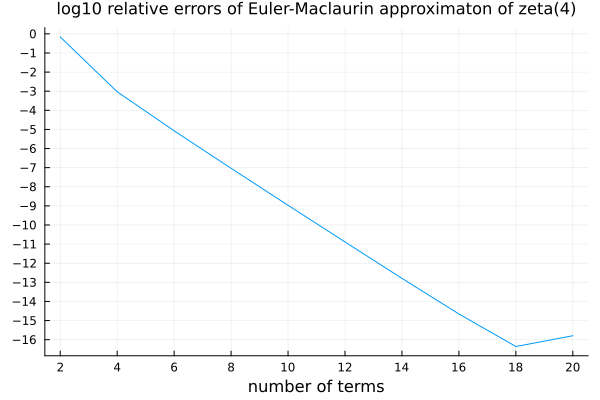

In [19]:
plot_em_relerrs(4)

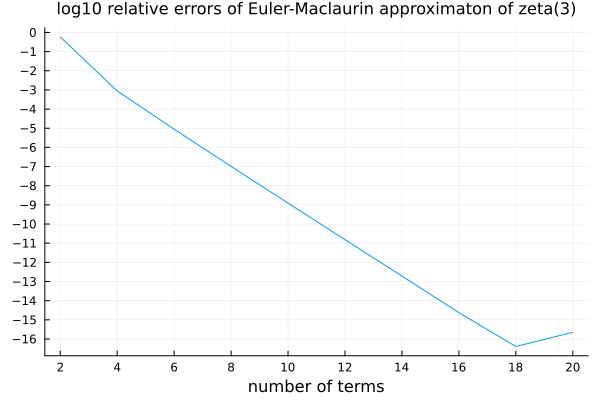

In [20]:
plot_em_relerrs(3)

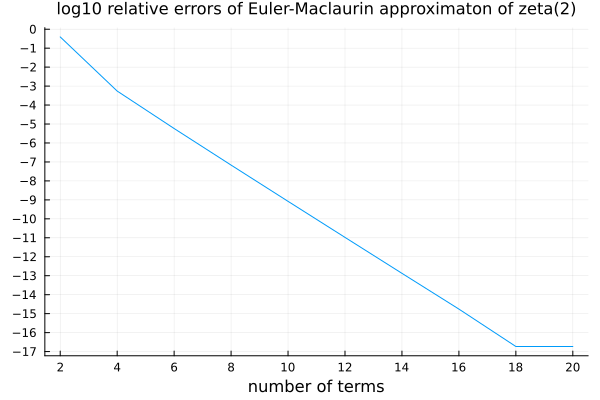

In [21]:
plot_em_relerrs(2)

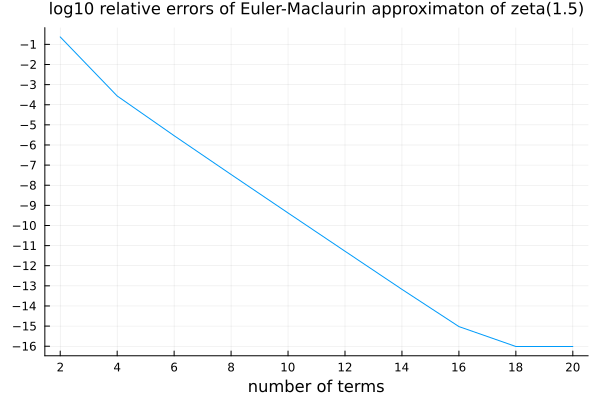

In [22]:
plot_em_relerrs(1.5)

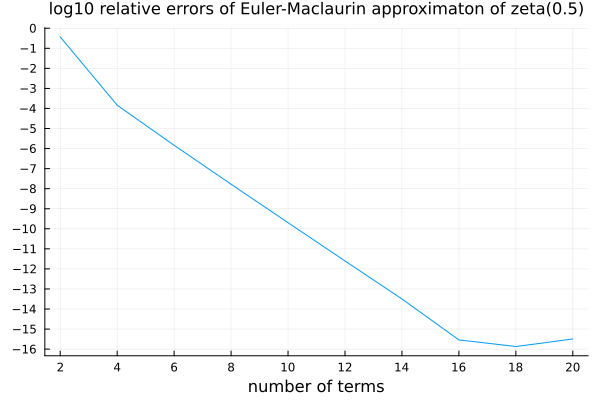

In [23]:
plot_em_relerrs(0.5)

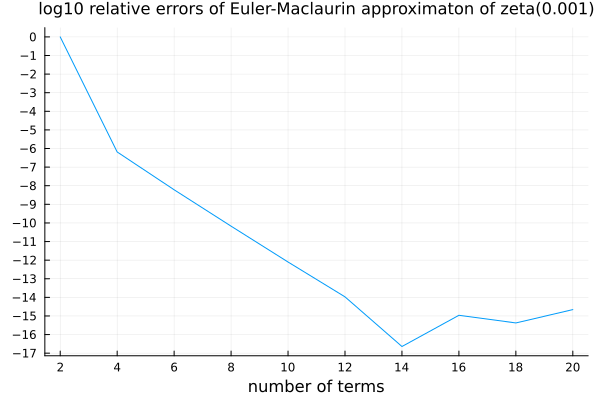

In [24]:
plot_em_relerrs(0.001)